In [11]:
import os
import shutil
import json
from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np

from run_experiments import run_experiments, Result

In [12]:
# set envvars
os.environ["OS_MEMORY_ALLOC_OVERRIDE"] = "25000000"
os.environ["ENGINE_PATH"] = "./target/x86_64-apple-darwin/release/hash_engine"
os.environ["RUST_LOG"] = "info"

In [13]:
# we need cwd to be the engine folder
os.chdir("./..")

In [4]:
# clear the output folders
try:
    shutil.rmtree('./output')
    shutil.rmtree('./parts')
except FileNotFoundError:
    pass

In [5]:
# results = run_experiments(
#     project_paths=[Path("./experiments/experiment-test")], 
#     run_all_experiments=True,
#     cli_run_override="./target/x86_64-apple-darwin/release/cli",
#     build_args=["--no-default-features"],
#     cli_args=[]
# )

In [6]:
results = run_experiments(
    project_paths=[
        Path("./experiments/sugarscape"), 
        Path("./experiments/age"), 
        Path("./experiments/neighbors"), 
        Path("./experiments/empty_sim"), 
        Path("./experiments/warehouse-logistics")], 
    run_all_experiments=True,
    cli_run_override="./target/x86_64-apple-darwin/release/cli",
    build_args=["--no-default-features"],
    cli_args=[],
    continue_on_fail=True
)

   --> src/datastore/storage/visitor.rs:171:12
    |
171 |     pub fn shrink_with_data_length(&mut self, size: usize) -> Result<BufferChange> {
    |            ^^^^^^^^^^^^^^^^^^^^^^^
    |
    = note: `#[warn(dead_code)]` on by default

    Finished release [optimized] target(s) in 0.23s


Found the following experiments in experiments/sugarscape: ['agent_density_linspace']
Running Experiment with cmd: ./target/x86_64-apple-darwin/release/cli -p experiments/sugarscape simple --experiment-name agent_density_linspace
Running Experiment succeeded
Found the following experiments in experiments/age: ['Simple']
Running Experiment with cmd: ./target/x86_64-apple-darwin/release/cli -p experiments/age simple --experiment-name Simple
Running Experiment succeeded
No experiments were found in experiments/neighbors
No experiments were found in experiments/empty_sim
Found the following experiments in experiments/warehouse-logistics: ['Alternate layouts', 'Find Optimal Layout']
Running Experiment with cmd: ./target/x86_64-apple-darwin/release/cli -p experiments/warehouse-logistics simple --experiment-name Alternate layouts
Running Experiment succeeded
Running Experiment with cmd: ./target/x86_64-apple-darwin/release/cli -p experiments/warehouse-logistics simple --experiment-name Find O

In [7]:
# results = run_experiments(
#     project_paths=[Path("./experiments/sugarscape")], 
#     run_all_experiments=False,
#     cli_run_override="./target/x86_64-apple-darwin/release/cli",
#     build_args=["--no-default-features"],
#     cli_args=["single-run", "--num-steps", "10"]
# )

In [8]:
def plot_line(name, x_data, y_data):
    for y_vals in y_data:
        y_vals = y_vals['vals']
        if not x_data:
            x_vals = np.arange(len(y_vals))
            # TODO: get x value from vals
        plt.plot(x_vals, y_vals)
    plt.show()
    
def plot_histogram(name, x_data, y_data):
    if x_data and not y_data:
        for x_vals in x_data:
            x_vals = x_vals['vals']
            plt.hist(x_vals)
    elif y_data and not x_data:   
        for y_vals in y_data:
            y_vals = y_vals['vals']
            plt.hist(y_vals)
    else:
        raise Exception("Histogram was called with both x and y vals")
    plt.show()
    
def plot_scatter(name, x_data, y_data):
    for y_vals in y_data:
        y_vals = y_vals['vals']
        if not x_data:
            x_vals = np.arange(len(y_vals))
            # TODO: get x value from vals
        plt.scatter(np.arange(nums.length), x_vals, y_vals)
    plt.show()
    
def plot_area(name, x_data, y_data):
    for y_vals in y_data:
        y_vals = y_vals['vals']
        if not x_data:
            x_vals = np.arange(len(y_vals))
            # TODO: get x value from vals
        plt.fill_between(x_vals, y_vals)
    plt.show()
    
def plot_box(name, x_data, y_data):
    for y_vals in y_data:
        y_vals = y_vals['vals']
        plt.boxplot(y_vals)
    plt.show()

In [9]:
def plot(plot_defs, outputs):
    for graph_name, plot_def in plot_defs.items():
        print(f"Plotting: {graph_name}")
        included_data = None
        if 'timeseries' in plot_def.keys():
            included_data = [{'y': data_name for data_name in plot_def['timeseries']}]
        else:
            included_data = plot_def['data']

        x_vals = []
        y_vals = []
        for data in included_data:    
            x = y = None
            if 'x' in data.keys():
                x = {
                    'name': data['x'],
                    'vals': [int(val['Number'] or 0) for val in outputs[data['x']]]
                }
                x_vals.append(x)
            if 'y' in data.keys():
                y = {
                    'name': data['y'],
                    'vals': [int(val['Number'] or 0) for val in outputs[data['y']]]
                }
                y_vals.append(y)

        plt.title(graph_name)
        if 'timeseries' in plot_def.keys() or plot_def['type'] == 'line':
            plot_line(graph_name, x_vals, y_vals)
        elif plot_def['type'] == 'histogram':
            plot_histogram(graph_name, x_vals, y_vals)
        elif plot_def['type'] == 'scatter':
            plot_scatter(graph_name, x_vals, y_vals)
        elif plot_def['type'] == 'area':
            plot_area(graph_name, x_vals, y_vals)
        elif plot_def['type'] == 'box':
            plot_box(graph_name, x_vals, y_vals)

Experiment Group: experiments/sugarscape
Experiment Name: agent_density_linspace-fcc8ba
Plotting: Average Sugar


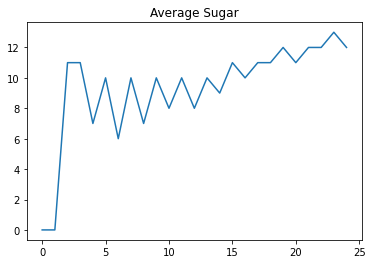

Plotting: Average Vision


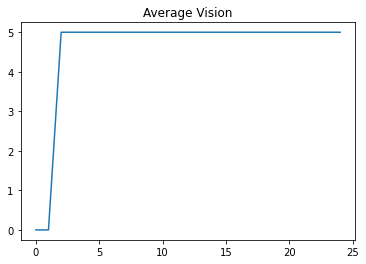

Plotting: Average Metabolism


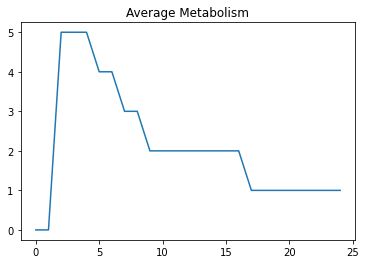

Plotting: Gini Coefficient


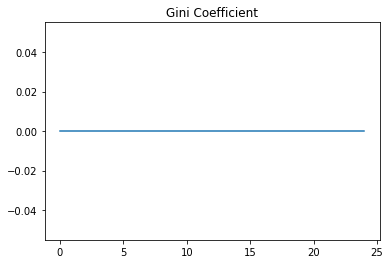

Plotting: waiting


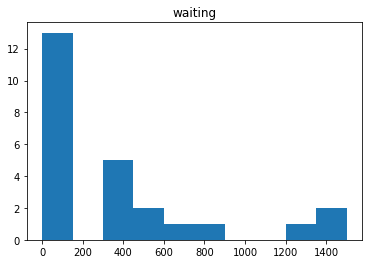

Plotting: Average Sugar


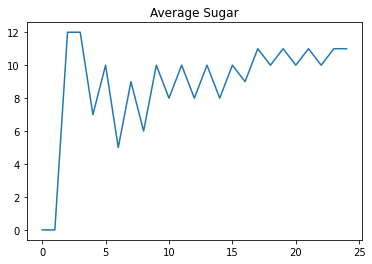

Plotting: Average Vision


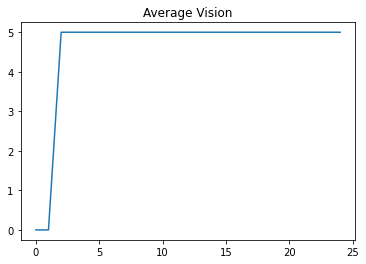

Plotting: Average Metabolism


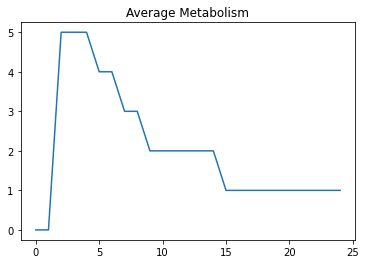

Plotting: Gini Coefficient


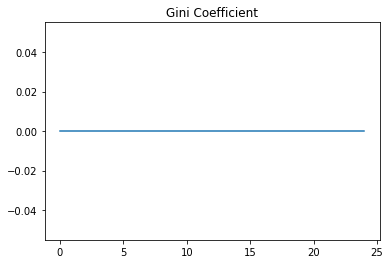

Plotting: waiting


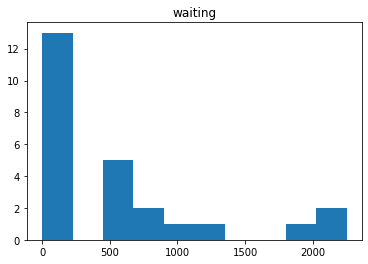

Plotting: Average Sugar


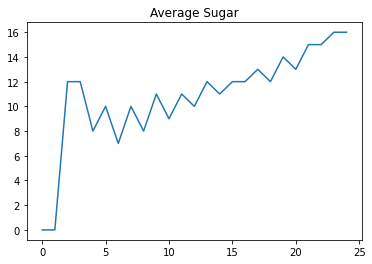

Plotting: Average Vision


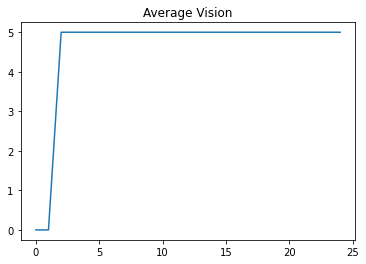

Plotting: Average Metabolism


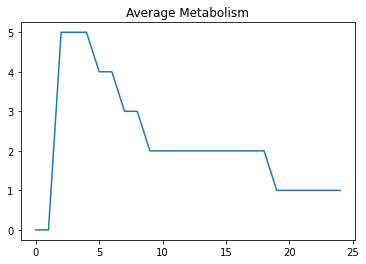

Plotting: Gini Coefficient


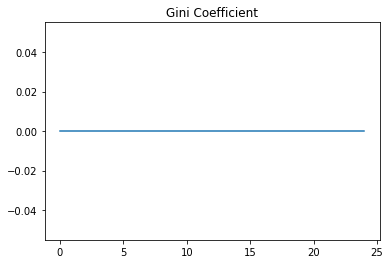

Plotting: waiting


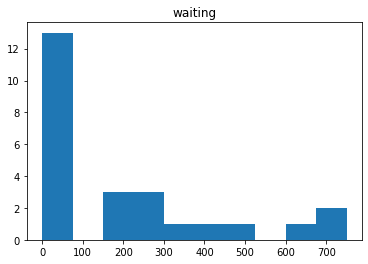

Experiment Group: experiments/age
Experiment Name: Simple-0bcfb3
Experiment Group: experiments/neighbors
Experiment Group: experiments/empty_sim
Experiment Group: experiments/warehouse-logistics
Experiment Name: Alternate layouts-caadba
Plotting: Stock Loaded


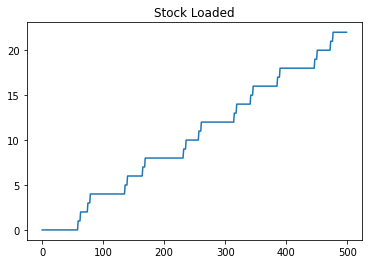

Plotting: Stock Loaded


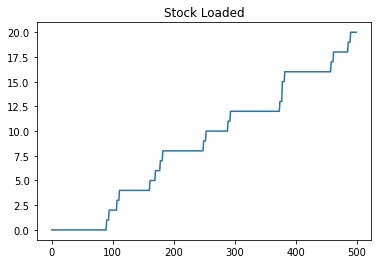

Experiment Name: Find Optimal Layout
Experiment failed, skipping


In [10]:
for experiment_group, experiment_results in results.items():
    print(f"Experiment Group: {experiment_group}")
    
    for experiment_name, experiment_result in experiment_results.items():
        print(f"Experiment Name: {experiment_name}")
        if experiment_result.res != Result.SUCCESS:
            print(f"Experiment failed, skipping")
            continue
        
        for output_folder in experiment_result.output_folders:
            global_properties = json.loads((output_folder / "globals.json").read_text())
            analysis_outputs = json.loads((output_folder / "analysis_outputs.json").read_text())
            state = json.loads((output_folder / "json_state.json").read_text())
            
            if not analysis_outputs['manifest'] and not analysis_outputs['buffers']:
                continue
            
            plot_defs = { plot_def['title']: (lambda d: d.pop('title') and d)(plot_def) for plot_def in analysis_outputs['manifest']['plots'] }
            outputs = analysis_outputs['buffers']
            
            plot(plot_defs, outputs)